In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr,pearsonr
from glob import glob
import utils
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = utils.df_train 
df_test = utils.df_test

In [3]:
X_train = utils.X_train
X_test = utils.X_test 
y_train = utils.y_train
y_test = utils.y_test

In [4]:
# plot the histgram of y_1,y_2 and benchmark_yhat
# sns.histplot(df_train.y_1)
# sns.histplot(df_train.y_2)
# sns.histplot(df_train.benchmark_yhat)
# plt.legend()

In [5]:

# Create a linear model (OLS) as the benchmark
benchmark_model = LinearRegression()
benchmark_model.fit(X_train, y_train)

# Predict on the test set
y_pred = benchmark_model.predict(X_test)


In [6]:
evaluator = utils.ModelEvaluator(y_test, y_pred)
evaluator.evaluate()
metrics = utils.ModelMetrics(y_pred, y_test, utils.test_date)
metrics.evaluate()

Information Coefficient: 0.0699
Average Returns of Top 10%: 0.0021
Accuracy of Top 10%: 0.1226
Information Coefficient: 0.0703
Average Returns of Top 10%: 0.0019
Accuracy of Top 10%: 0.1250


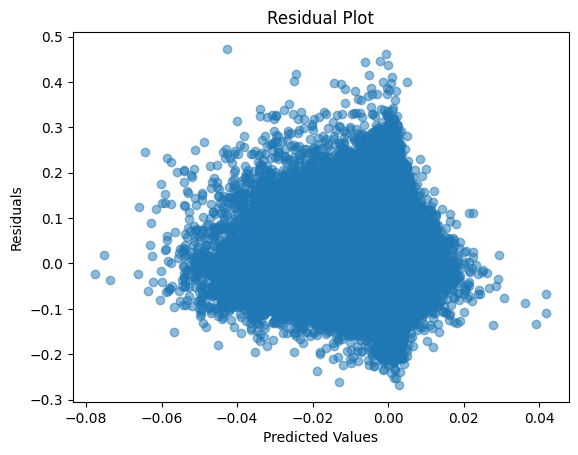

Mean Residual: 0.0004
Median Residual: -0.0021
Standard Deviation of Residuals: 0.0283


In [8]:


# Calculate residuals
residuals = y_test - y_pred

# Visualize residuals with a scatter plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate summary statistics for residuals
mean_residual = np.mean(residuals)
median_residual = np.median(residuals)
std_residual = np.std(residuals)

print(f"Mean Residual: {mean_residual:.5f}")
print(f"Median Residual: {median_residual:.5f}")
print(f"Standard Deviation of Residuals: {std_residual:.5f}")


In [9]:
np.unique(utils.test_date)
mask = '2021-01-04' == utils.test_date

In [10]:
utils.test_date.values

array(['2021-01-04', '2021-01-04', '2021-01-04', ..., '2021-12-31',
       '2021-12-31', '2021-12-31'], dtype=object)

In [11]:
y_hat = y_pred 
y = y_test.values
timestamps = utils.test_date.values


In [12]:
y_hat = pd.Series(y_hat, index=timestamps)
y = pd.Series(y, index=timestamps)


In [13]:
y_hat

2021-01-04   -0.000358
2021-01-04   -0.000769
2021-01-04    0.000937
2021-01-04   -0.001138
2021-01-04    0.000037
                ...   
2021-12-31    0.000624
2021-12-31    0.000169
2021-12-31    0.000386
2021-12-31   -0.000517
2021-12-31    0.000623
Length: 2813980, dtype: float64

In [14]:
mask = timestamps[0]==timestamps

In [15]:
y_hat[mask]

2021-01-04   -0.000358
2021-01-04   -0.000769
2021-01-04    0.000937
2021-01-04   -0.001138
2021-01-04    0.000037
                ...   
2021-01-04    0.001282
2021-01-04    0.001085
2021-01-04    0.001394
2021-01-04    0.000104
2021-01-04    0.000914
Length: 11197, dtype: float64

In [16]:
pearsonr(y_hat[mask], y[mask])

PearsonRResult(statistic=0.1149434308276798, pvalue=3.0349865654812356e-34)